<a href="https://colab.research.google.com/github/vladop22/PRA3024-Analysis-of-Big-Data-in-Physics/blob/main/GW_exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART 1

In [1]:
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 MB 102.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 162.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 249.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 KB 191.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 KB 273.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 KB 140.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 KB 177.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 294.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting re

In [4]:
#Since the data file was uploaded to the local Google Drive, we need to mount the drive content in order to use the file in question. 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Firstly, we have to import the important libraries/packages for data analysis, visualization, and computing
%matplotlib inline
import pylab
import lal
from pycbc.filter import highpass,matched_filter
from pycbc.conversions import mass1_from_mchirp_q
from pycbc.frame import read_frame
from pycbc.filter import resample_to_delta_t, highpass
import numpy as np
from pycbc import types
from pycbc.waveform import get_td_waveform,get_fd_waveform
from pycbc.waveform import td_approximants, fd_approximants
import pycbc.psd
from pycbc.psd import interpolate
from pycbc.filter import sigma

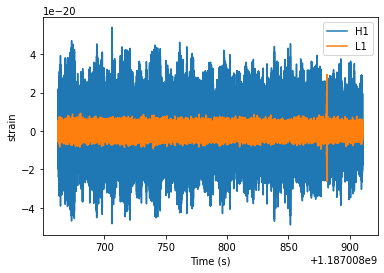

In [6]:
d = np.load('/content/drive/MyDrive/GW_noisedata-2.npy')
dt = d[:, 0]
i=1
strain, stilde = {}, {}
for ifo in ['H1', 'L1']: # 'H1' and 'L1' datasets are loaded using the for loop
  ts = types.TimeSeries(d[:, i], delta_t = dt[1]- dt[0],epoch=dt[0]) # data is converted to time series using the time step (delta_t)
  # and the starting time (epoch)
  strain[ifo] = resample_to_delta_t(highpass(ts, 15.0), 1.0/2048) # highpassing the filter, i.e., removing data from lower frequency
  # (cutoff = 15Hz), and downsizing the data to 2048 Hz
  strain[ifo] = strain[ifo].crop(4, 4) # cropping the first 4 and the last 4 seconds of the data
  stilde[ifo] = strain[ifo].to_frequencyseries() # creating the frequency domain
  i+=1

# plot of strain vs time
pylab.plot(strain['H1'].sample_times, strain['H1'], label= 'H1')
pylab.plot(strain['L1'].sample_times, strain['L1'], label= 'L1')
pylab.legend()
pylab.xlabel('Time (s)')
pylab.ylabel('strain')
pylab.show()


We can observe a strain from L1 (orange) in the range from 850 to 900 (+1.187008e9) seconds

In [5]:
from pycbc.waveform import td_approximants, fd_approximants

# List of td approximants that are currently available, using TaylorF2 in the tasks below.
print(td_approximants())


['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'IMRPhenomTP', 'IMRPhenomTPHM', 'TaylorF2', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SEOBN

PART 2

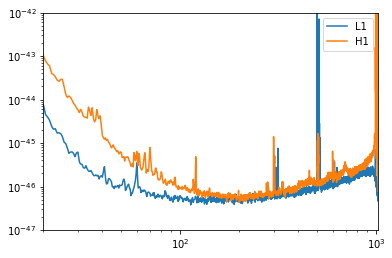

In [8]:
psds = {} # before determining snr, we need to calculate the psds
for ifo in ['L1', 'H1']: # Welch method
    delta_t = strain[ifo].delta_t # time interval between each data point
    seg_len = int(2 / delta_t) # segment length 
    seg_stride = int(seg_len / 2) # stride between segments, i.e., how much do we slide the window between each segment. Here it is 
    # half of each segment
    psds[ifo]  = pycbc.psd.welch(strain[ifo],
                      seg_len=seg_len,
                      seg_stride=seg_stride)
    
    psds[ifo] = interpolate(psds[ifo], stilde[ifo].delta_f) # psd is interpolated to the frequency resolution of the frequency series 

    pylab.loglog(psds[ifo].sample_frequencies, psds[ifo], label=ifo) # not needed for the assignment, but a quick and interesting visualization
    pylab.xlim(20, 1024)
    pylab.ylim(1e-47, 1e-42)
pylab.legend(); 

In [10]:
chirp_mass = np.arange(1.1966, 1.1996, .0001) # generating the chirp mass
# chirp mass defines the amplitude and the duration of a GW signal from a binary black hole merger

masses = mass1_from_mchirp_q(chirp_mass, 1) # smaller range allows for a higher precision in calculation of the snrs


snrs = [] #calculating the snrs

for m in masses:
    hp, hc = get_fd_waveform(approximant="TaylorF2", 
                             mass1=m, mass2=m, 
                             f_lower=20, delta_f=stilde[ifo].delta_f) # generating the waveform under the assumption
                             # m_1 = m_2; cutoff frequency of 20 Hz
    hp.resize(len(stilde[ifo])) # waveform is being resized to the length of the stilde to ensure they can be used for further analysis
    
    max_snr={}
    for ifo in ['L1', 'H1']:
        snr = matched_filter(hp, stilde[ifo], psd=psds[ifo], low_frequency_cutoff=20.0) # we use the matched filter on data to find the peak value

         # complex snr at the peak
        _, idx = snr.abs_max_loc()
        max_snr[ifo] = snr[idx]
        
    snrs.append(max_snr) 


the optimal mass is 1.3756811499444492 solar masses


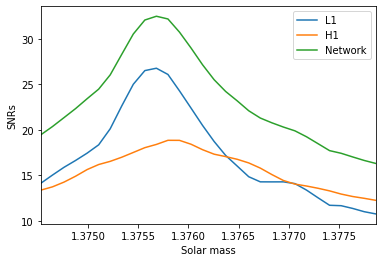

In [11]:
snrs_L1=[abs(snr['L1']) for snr in snrs] # separating the snr values from the two detectors
snrs_H1=[abs(snr['H1']) for snr in snrs]

nsnr=np.sqrt((np.array(snrs_L1)**2+np.array(snrs_H1)**2)) # formula for determining the snr of the whole network

pylab.plot(masses,snrs_L1,label='L1') # plotting snr for L1, H1, and network vs the solar mass
pylab.plot(masses,snrs_H1,label='H1')
pylab.plot(masses,nsnr,label='Network')
pylab.xlim(min(masses),max(masses))
pylab.legend()
pylab.ylabel('SNRs')
pylab.xlabel('Solar mass')
     
#determining the max index with the maximum snr
max_index=np.where(nsnr==max(nsnr))

print('the optimal mass is {} solar masses'.format(masses[max_index][0]))

As can be observed in the plot above, L1 has a significantly higher snr value than 8. Therefore, a GW signal should be observed.

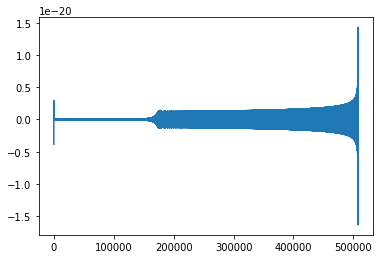

In [15]:
ifo = 'L1' # selecting the L1 detector based on the observation in the plot above
data = stilde[ifo]
conditioned = stilde[ifo] # frequency series of the L1 detector
m = 1.376 # best mass as determined in the plot above

hp, hc = get_fd_waveform(approximant="TaylorF2", # obtaining a waveform using the assumption of m_1 = m_2, and the cutoof
                         # frequency of 20 Hz
                             mass1 = m, mass2 = m, 
                             f_lower=20, delta_f=conditioned.delta_f)
hp.resize(len(conditioned)) # waveform is resized to the length of the L1 data.

template = hp.cyclic_time_shift(hp.start_time) # shifts the time of a time-domain signal 

# plotting the time-series
pylab.plot(template.to_timeseries())

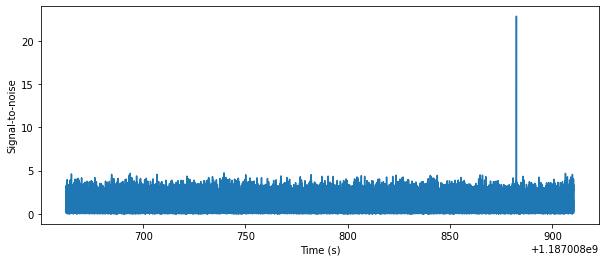

The snr peak is 22.836756671543277 at time= 1187008882.4429688


In [16]:
# Then, we can determine the corresponding time of the snr peak we found. 
snr= matched_filter(template, conditioned,
                     psd=psds[ifo], low_frequency_cutoff=20)


pylab.figure(figsize=[10, 4]) # plotting snr vs time
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax() # determining the snr peak and its time
snrp = snr[peak]
time_p = snr.sample_times[peak]
print('The snr peak is {} at time= {}'.format(abs(snrp),time_p))

I managed to obtain an SNR peak of 24 by using a higher cutoff frequency (35 Hz), but was unsure whether that was optimal for the analysis so I have decided to stick with 20 Hz.

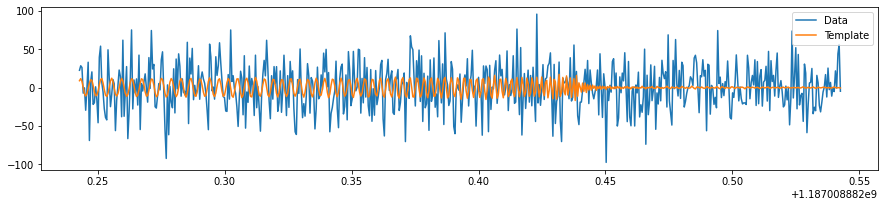

In [20]:
# Now, we can plot the data and the overlap with the template signal we will generate.

white_data = (data / psds[ifo] ** 0.5).to_timeseries() # by whitening the data, we should ideally remove any 
# frequency-dependent noise from the signal, making it easier to detect a GW signal in the data. 


dt =  time_p - data.start_time # the difference between these two defines the time shift we need to apply to the template in order
# to match our data
template_aligned=hp.cyclic_time_shift(dt) # cyclic shift of a time series
template_aligned /= sigma(template_aligned, psd=psds[ifo], low_frequency_cutoff=20.0) # the normalization of the template

template_aligned*= snrp # scaling of the template
template_aligned.start_time=data.start_time

white_template=(template_aligned/psds[ifo] ** 0.5).to_timeseries() # whitening of the template, done exactly like data whitening

white_data_plot=white_data.time_slice(time_p -0.2,time_p +0.1) # we focus around the time of the event
white_template_plot=white_template.time_slice(time_p -0.2,time_p +0.1)

pylab.figure(figsize=[15, 3]) # plotting the signal and template on top of each other to see correspondence
pylab.plot(white_data_plot.sample_times, white_data_plot, label="Data")
pylab.plot(white_template_plot.sample_times, white_template_plot, label="Template")
pylab.legend()
pylab.show()


In between, 0.40 and 0.45, the signal can be observed. However, the signal is not significant. This could be partially because some of the noise still pertains in the data, or perhaps this GW signal in particular is not of a high intensity. Still, there is a decent correspondence between the signal and the template in the mentioned region.

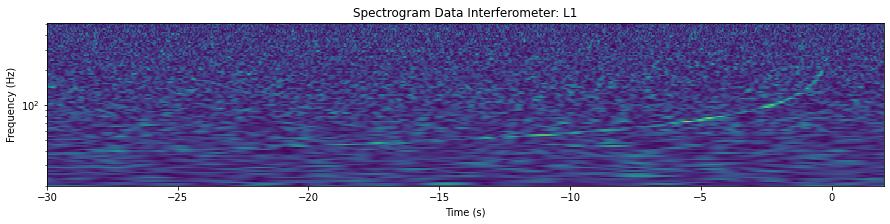

In [24]:
# Generating a q-transform 
zoom = white_data.time_slice(time_p - 30, time_p + 2) # time slice around the peak of the signal

times, freqs, power = zoom.qtransform(.01, logfsteps=100, frange=(20, 512), qrange=(110, 110)) # times, freqs, and power
# are arrays containing those values from the q-transform of the zoomed data

pylab.figure(figsize=(15,3))
pylab.pcolormesh(times - time_p, freqs, power**0.5, vmin=0, vmax=6) # vmin and vmax set the values for the color scale.
pylab.ylim(20, 512)
pylab.title('Spectrogram Data Interferometer: {}'.format(ifo))
pylab.xlabel('Time (s)')
pylab.ylabel('Frequency (Hz)')
pylab.yscale('log')


To confirm that the curve(signal) in the plot above is actually the signal, we need to remove the signal from the data and replot the spectogram.

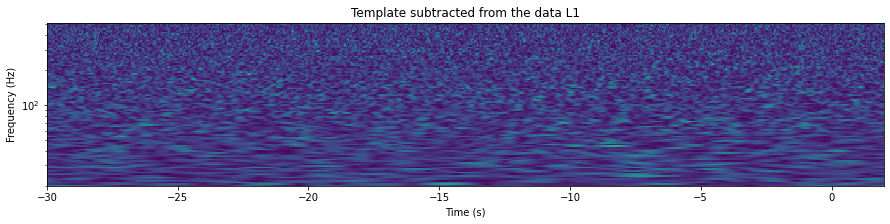

In [27]:
stilde2 = data - template_aligned # subtracting the signal from the data

hoft = (stilde2 / psds[ifo] ** 0.5).to_timeseries() # whitening the data

zoom = hoft.time_slice(time_p - 30,time_p + 2) # focusing around the peak time

# Calculate the qtransform, identical steps as performed in the plot above
times, freqs, power = zoom.qtransform(.01, logfsteps=100, frange=(20, 512), qrange=(110, 110))

# Plotting the spectrogram
pylab.figure(figsize=(15,3))
pylab.pcolormesh(times - time_p, freqs, power**0.5, vmin=0, vmax=6)
pylab.ylim(20, 512)
pylab.title('Template subtracted from the data {}'.format(ifo))
pylab.xlabel('Time (s)')
pylab.ylabel('Frequency (Hz)')
pylab.yscale('log')

Now, we can confirm that the model is appropriate since the curve (signal) is missing from the second spectrogram we created (by subtracting the signal from the data). Below, we will repeat the same procedure for the H1 detector. However, we will only show the overlapping and the plot of the spectrogram. 

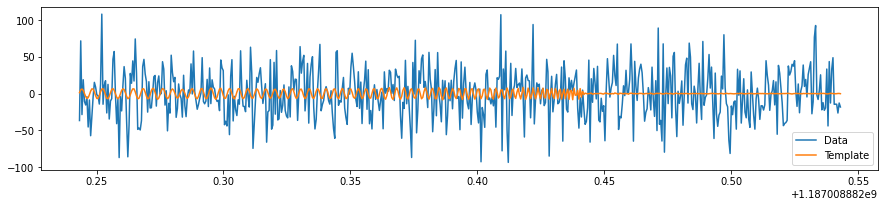

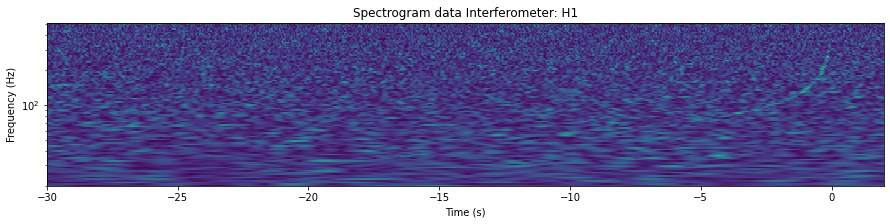

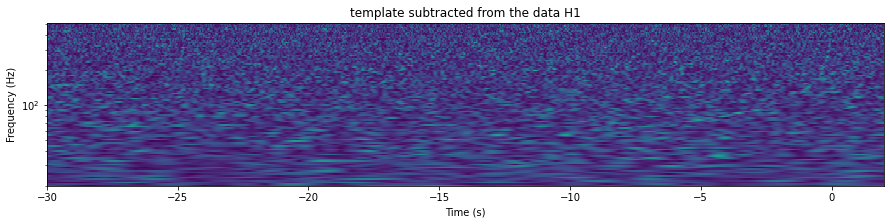

In [30]:
ifo='H1'# selecting the H1 detector
data=stilde[ifo] # frequency series
m=1.38 # optimal mass

hp, hc = get_fd_waveform(approximant="TaylorF2", # similarly to before, we need to generate the waveform and resize it to match the data size
                             mass1=m, mass2=m, 
                             f_lower=20, delta_f=data.delta_f)
hp.resize(len(data))

template = hp.cyclic_time_shift(hp.start_time) #cylic time shift

snr= matched_filter(template, data,
                     psd=psds[ifo], low_frequency_cutoff=20) #time corresponding to the snr peak

peak = abs(snr).numpy().argmax() # detecting the peak 
snr_peak = snr[peak] # under the assumption that the signal is not strong, as was observed in the snr to mass graph in the very beginning,
# we can implenet redection of the peak 


# by performing the same analysis as above, we can match the template with the data after data whitening and template whitening and ajustment
# of the time of the two sets
time_p = snr.sample_times[peak]
white_data = (data / psds[ifo] ** 0.5).to_timeseries()

dt =  t_peak - data.start_time
template_aligned=hp.cyclic_time_shift(dt)
template_aligned /= sigma(template_aligned, psd=psds[ifo], low_frequency_cutoff=20.0)
template_aligned*=snr_peak
template_aligned.start_time=data.start_time


white_template=(template_aligned/psds[ifo] ** 0.5).to_timeseries()
white_data_plot=white_data.time_slice(time_p-0.2,time_p+0.1)
white_template_plot=white_template.time_slice(time_p-0.2,time_p+0.1)

#plotting the correspondence between the data and the template
pylab.figure(figsize=[15, 3])
pylab.plot(white_data_plot.sample_times, white_data_plot, label="Data")
pylab.plot(white_template_plot.sample_times, white_template_plot, label="Template")
pylab.legend()
pylab.show()


# Similarly to above, in order to plot a spectrogram, we need ot perform a q-transform 
zoom = white_data.time_slice(time_p - 30, time_p + 2)

times, freqs, power = zoom.qtransform(.01, logfsteps=100, frange=(20, 512), qrange=(110, 110))

pylab.figure(figsize=(15,3))
pylab.pcolormesh(times - time_p, freqs, power**0.5, vmin=0, vmax=6)
pylab.ylim(20, 512)
pylab.title('Spectrogram data Interferometer: {}'.format(ifo))
pylab.xlabel('Time (s)')
pylab.ylabel('Frequency (Hz)')
pylab.yscale('log')
pylab.show()


# Then, we plot another spectrogram without the data to confirm that the model is appropriate for the data we analysed.
stilde2 = data - template_aligned
hoft = (stilde2 / psds[ifo] ** 0.5).to_timeseries()
zoom = hoft.time_slice(time_p - 30,time_p + 2)
times, freqs, power = zoom.qtransform(.01, logfsteps=100, frange=(20, 512), qrange=(110, 110))


# Plotting the second spectrogram without the signal peak
pylab.figure(figsize=(15,3))
pylab.pcolormesh(times - time_p, freqs, power**0.5, vmin=0, vmax=6)
pylab.ylim(20, 512)
pylab.title('template subtracted from the data {}'.format(ifo))
pylab.xlabel('Time (s)')
pylab.ylabel('Frequency (Hz)')
pylab.yscale('log')
pylab.show()

In the analysis of the second detector, H1, we can say that the model is not as adequate as the one we created for the L1 detector of the GW signal.However, the signal in the second spectrogram disappears, not quite fully. This could be for a number of different reasons, but primarily due to the lower snr ratio we determined in the beginning of this analysis. Therefore, it is harder to distinguish between the noise and a GW signal in this detector. Also, it could be that this detector has a lower sensibility band that is discussed in exercise 3. 

PART 3

In [36]:
from pycbc.psd import aLIGOZeroDetHighPower
from pycbc.filter import match

mass = 10
f_low = 30 # cutoff frequency
sample_rate=4096

hp, hc = get_td_waveform(approximant="TaylorT2", # waveform for m_1 = m_2 = 10
                     mass1=10,
                     mass2=10,
                     delta_t=1/sample_rate,
                     f_lower=30) 
mass_range = np.arange(5, 15,0.5 ) # mass range from 5 to 15 solar masses

h_to_compare=[] # array that stores the waveforms to be compared

for m in mass_range:
  sp,sc=get_td_waveform(approximant="TaylorT2",
                     mass1=m,
                     mass2=m,
                     delta_t=1/sample_rate,
                     f_lower=30)
  h_to_compare.append(sp) #iterating over the mass range 

tlen=max(len(hp),len(h_to_compare[0])) # resizing all of the waveforms to make sure they are of identical size and therefore, comparable
hp.resize(tlen)
for i in h_to_compare:
  i.resize(tlen)


m_values=[]
for h in h_to_compare:
  delta_f=1.0/h.duration
  flen=tlen//2 +1
  psd=aLIGOZeroDetHighPower(flen, delta_f,f_low)
  m,i=match(hp,h,psd=psd,low_frequency_cutoff=f_low) # match function calculates the overlap between waveforms using their psd values in
  # a set frequency zone
  m_values.append(m) 

Text(0.5, 0, 'Mass')

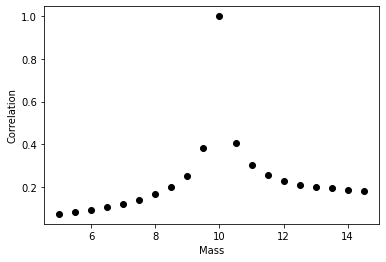

In [35]:
# Plotting the correlation vs mass
pylab.plot(mass_range, m_values, 'o', color='black');
pylab.ylabel('Correlation')
pylab.xlabel('Mass')


It is expected to observe such a correlation graph. The closer the two waveforms are, the more correlated they will be. Therefore, at m = 10, the correlation is the highest since the two waveforms are the same. 